<a href="https://colab.research.google.com/github/azizadila/H8_062/blob/main/PYTN_Final_Project_batch_062_Aziza_Noor_Fadhila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`**In Hospital df Prediction**`

---

**Context**
The predictors of in-hospital mortality for intensive care units (ICU)-admitted HF patients remain poorly characterized. I aimed to develop and validate a prediction model for all-cause in-hospital mortality among ICU-admitted HF patients.So, I choose Classification as a Topic.

**Content**
Using Structured Query Language queries (PostgreSQL, version 9.6), demographic characteristics, vital signs, and laboratory values data were extracted from the following tables in the MIMIC III dataset: ADMISSIONS, PATIENTS, ICUSTAYS, DICD DIAGNOSIS, DIAGNOSISICD, LABEVENTS, DLABIEVENTS, CHARTEVENTS, DITEMS, NOTEEVENTS, and OUTPUTEVENTS. Based on previous studies 7-9 13-15, clinical relevance, and general availability at the time of presentation, we extracted the following data: demographic characteristics (age at the time of hospital admission, sex, ethnicity, weight, and height); vital signs (heart rate, (HR), systolic blood pressure [SBP], diastolic blood pressure [DBP], mean blood pressure, respiratory rate, body temperature, saturation pulse oxygen [SPO2], urine output [first 24 h]); comorbidities (hypertension, atrial fibrillation, ischemic heart disease, diabetes mellitus, depression, hypoferric anemia, hyperlipidemia, chronic kidney disease (CKD), and chronic obstructive pulmonary disease [COPD]); and laboratory variables (hematocrit, red blood cells, mean corpuscular hemoglobin [MCH], mean corpuscular hemoglobin concentration [MCHC], mean corpuscular volume [MCV], red blood cell distribution width [RDW], platelet count, white blood cells, neutrophils, basophils, lymphocytes, prothrombin time [PT], international normalized ratio [INR], NT-proBNP, creatine kinase, creatinine, blood urea nitrogen [BUN] glucose, potassium, sodium, calcium, chloride, magnesium, the anion gap, bicarbonate, lactate, hydrogen ion concentration [pH], partial pressure of CO2 in arterial blood, and LVEF), using Structured Query Language (SQL) with PostgreSQL (version 9.6). Demographic characteristics and vital signs extracted were recorded during the ﬁrst 24 hours of each admission and laboratory variables were measured during the entire ICU stay. Comorbidities were identified using ICD-9 codes. For variable data with multiple measurements, the calculated mean value was included for analysis.The primary outcome of the study was in-hospital mortality, defined as the vital status at the time of hospital discharge in survivors and non-survivors. 

**Source**
https://www.kaggle.com/saurabhshahane/in-hospital-mortality-prediction

**Class :** 2

**Amount of Data :** 428 Rows, 51 Columns

**Objectives**
The goal is to predict if the patient alive or death in the ICU

Target Variable - Outcome
0 - Alive
1 - Death

In [66]:
#IMPORT LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
#DATA LOADING AND CLEANING

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Assignment 1/data01.csv")
df = df.dropna()
df.rename(columns={'gendera': 'gender', 'hypertensive': 'hypertension','CHD with no MI': 'ischemic heart disease','Hyperlipemia': 'hyperlipidemia','Renal failure': 'CKD'}, inplace=True)
print("amount of data =",df.shape)
print("number of class =",df.ndim)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
amount of data = (428, 51)
number of class = 2


,group,ID,outcome,age,gender,BMI,hypertension,atrialfibrillation,ischemic heart disease,diabetes,deficiencyanemias,depression,hyperlipidemia,CKD,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.9600,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.30,10.600000,1.000000,1956.0,148.00,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230000,21.166667,0.500,40.000000,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.6200,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.50,11.275000,0.950000,4081.0,16.00,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268000,30.571429,0.500,71.500000,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.2775,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.50,27.066667,2.666667,668.0,85.00,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370000,38.571429,0.600,75.000000,55
5,1,154653,0.0,76,1,24.262293,1,1,0,0,1,0,1,1,1,74.181818,118.100000,52.950000,20.545455,35.266667,96.818182,1840.0,27.333333,3.2350,26.566667,31.483333,84.500,16.516667,9.516667,273.000,85.40,0.30,9.30,18.783333,1.700000,34183.0,28.00,1.612500,26.625000,98.333333,4.075000,136.250000,8.466667,96.750000,13.125000,1.771429,7.310000,30.500000,0.600,65.500000,35
6,1,194420,0.0,72,1,39.667426,1,0,0,0,0,0,1,1,1,69.636364,106.565217,47.826087,19.148148,35.603175,95.636364,2450.0,28.937500,3.7200,24.337500,31.312500,77.875,17.400000,7.975000,140.250,80.70,0.20,13.45,14.000000,1.200000,29683.0,108.25,2.960000,109.133333,105.600000,4.606667,144.133333,8.775000,106.666667,15.200000,1.875000,7.169231,26.800000,0.625,69.769231,55


hypertension              44
atrialfibrillation        33
hyperlipidemia            26
diabetes                  26
CKD                       12
deficiencyanemias         11
ischemic heart disease     5
depression                 3
dtype: int64


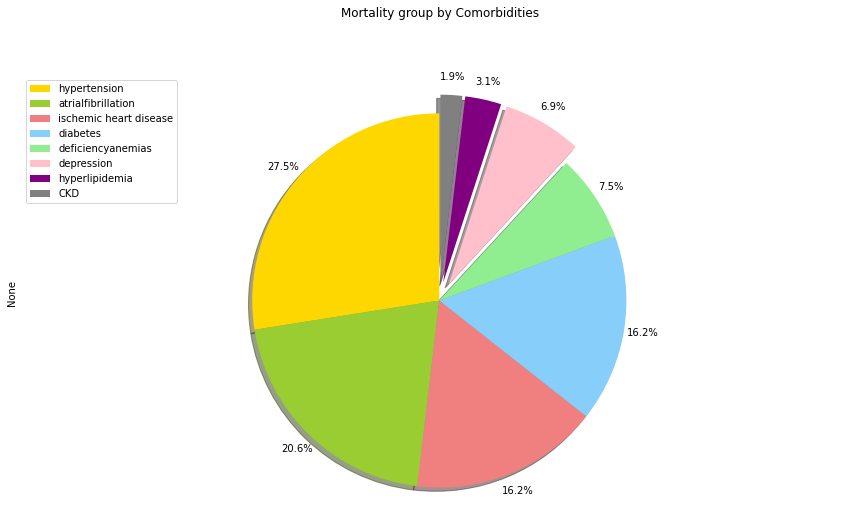

In [68]:
#DATA VISUALIZATION (1) - ANALYSIS ON DEATH BASED ON COMORDIBITIES FACTORS

#GROUPING DATA YANG AKAN DIBUAT PIE CHART
data01=df[(df['outcome']==1)]
data01=data01.iloc[:,6:14].sum()
data01.sort_values(inplace=True,ascending=False)
print(data01)

#PEMILIHAN WARNA PIE CHART DAN JARAK ANTAR PIE CHART
colors_list = ['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink','purple','grey']
explode_list = [0,0,0,0,0,0.1,0.1,0.1]

data01.plot(kind='pie',
              figsize=(15,8),
              autopct='%1.1f%%',
              startangle=90,
              shadow=True,
              labels=None,
              pctdistance=1.1,
              colors=colors_list,
              explode=explode_list,
)

#PLOTTING PIE CHART
plt.title('Mortality group by Comorbidities',y=1.12)
plt.axis('equal')
plt.legend(labels=['hypertension','atrialfibrillation','ischemic heart disease','diabetes','deficiencyanemias','depression','hyperlipidemia','CKD','COPD'],loc='upper left')
plt.show()

As we can see that major factors that caused death in the ICU is hypertension (27.5%), atrialfibrillation (20.6%) and ischemic heart disease (16.2%)

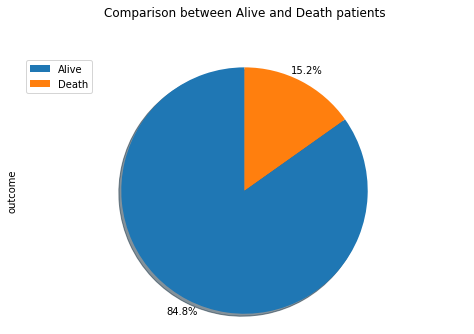

In [69]:
#DATA VISUALIZATION (1) - ANALYSIS ON DEATH BASED ON COMORDIBITIES FACTORS

data02=df['outcome'].value_counts()
data02.plot(kind='pie',
              figsize=(8,5),
              autopct='%1.1f%%',
              startangle=90,
              shadow=True,
              labels=None,
              pctdistance=1.1,
)

#PLOTTING PIE CHART
plt.title('Comparison between Alive and Death patients',y=1.12)
plt.axis('equal')
plt.legend(labels=['Alive','Death'],loc='upper left')
plt.show()

As we can see that in the ICU there are more Alive patient  than Death patient

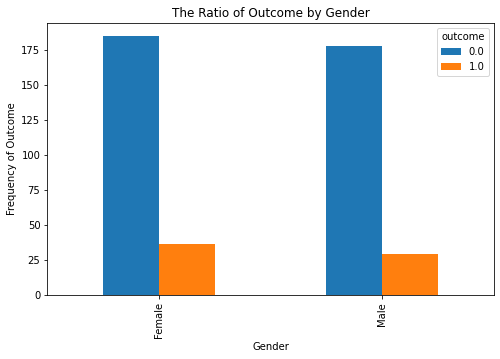

In [70]:
#DATA VISUALIZATION - ANALYSIS ON THE RATIO BETWEEN ALIVE OR DEATH ACCORDING TO GENDER

df['gender'].replace({1: "Male", 2: "Female"}, inplace=True)
pd.crosstab(df.gender,df.outcome).plot(kind='bar',figsize=(8,5))
plt.title('The Ratio of Outcome by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Outcome')
plt.show()

As we can see that both Female and Male ratio has no significant differences.

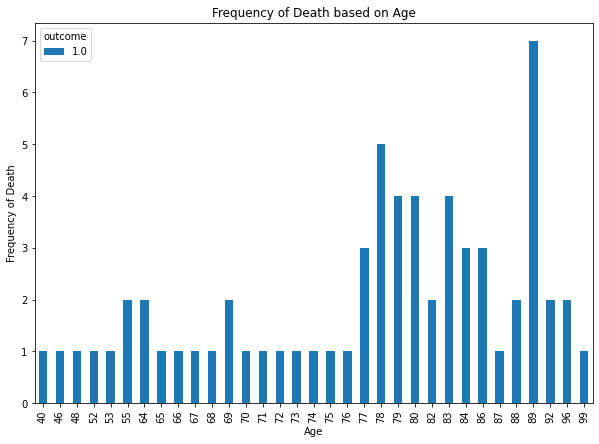

In [71]:
#DATA VISUALIZATION - ANALYSIS ON FREQUENCY OF DEATH BASED ON AGE

data03=df[(df['outcome']==1)]
pd.crosstab(data03.age,data03.outcome).plot(kind='bar',figsize=(10,7))
plt.title('Frequency of Death based on Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Death')
plt.show()


As we can see, the older the patient, the higher the mortality factor

In [72]:
#DATA PRE-PROCESSING

X=df.drop('outcome',1)
y=df.outcome

X=pd.get_dummies(X)
df=pd.get_dummies(df)

#X.head()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [73]:
#PENDEFINISIAN MODEL

## Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

## Create a Random Forest Classifier
model=RandomForestClassifier()

The reason why I choose Random Forest is because I need more accurate prediction

In [74]:
#Training the model using the training set
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True,ccp_alpha=0.0,class_weight=None,criterion='gini',max_depth=None,max_features='auto',max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0, min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=100,n_jobs=None,oob_score=False,random_state=None,verbose=0,warm_start=False)

#Predict the response for the dataset
y_pred=model.predict(x_test)

In [75]:
#Evaluating Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy :",accuracy_score(y_test,y_pred))
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print(classification_report(y_test,y_pred))

Accuracy : 0.9186046511627907
[[76  0]
 [ 7  3]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        76
         1.0       1.00      0.30      0.46        10

    accuracy                           0.92        86
   macro avg       0.96      0.65      0.71        86
weighted avg       0.93      0.92      0.90        86



As we can see, from this we got a classification rate of 91%

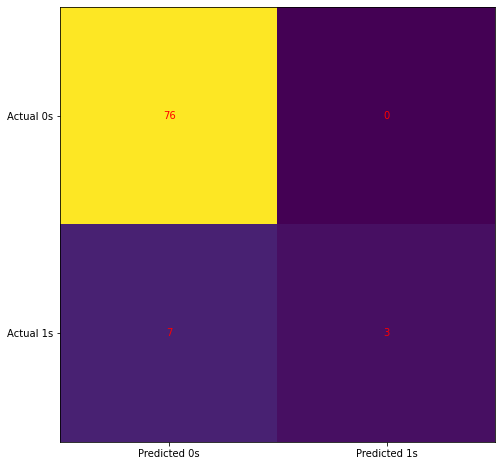

In [76]:
#ViSUALIZATION CONFUSION MATRIX

fig, ax=plt.subplots(figsize=(8,8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
  for j in range (2) :
    ax.text(j,i,matrix[i,j],ha='center',va='center',color='red')
plt.show()

From picture above, the conclusion are :


1. We can see that we are getting 76 true positives. This corresponds to patients that alive and our model identified them correctly.
2. We also get 1 true negative pairs. This means that our algorithm has discovered correctly 3 patients that death/passed away
3. False positives represent the number of patients that our model classified as ones that alive but in reality, they are not. And we have 7 pairs of false positives.
4. False negatives represent patients that death/passed away but our model predicted that they are not. We have 0 pairs of false negative.

